<a href="https://colab.research.google.com/github/FiddiCoder/-FIA-Project/blob/main/ml_pipeline/Movie_Recommender_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
import pandas as pd
import numpy as np
import re
from tqdm import tqdm_notebook as tqdm
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [235]:
import os
import tarfile
from six.moves import urllib
#download dataset

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/FiddiCoder/-FIA-Project/main/"
FILE_PATH = os.path.join("dataset")
FILE_URL1 = DOWNLOAD_ROOT + "dataset/imdb_top_1000.csv"

def fetch_file_data1(file_url1=FILE_URL1, file_path1=FILE_PATH):
    os.makedirs(file_path1, exist_ok=True)
    csv_path1 = os.path.join(file_path1, "imdb_top_1000.csv")
    urllib.request.urlretrieve(file_url1, csv_path1)

fetch_file_data1()

In [236]:
#load data
datapath = os.path.join("dataset","")
imdb = pd.read_csv(datapath + "imdb_top_1000.csv")

In [237]:
#prova stampa
imdb.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"


In [238]:
#download english stopwards (sinossi dei film in inglese)

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/FiddiCoder/-FIA-Project/main/"
FILE_PATH = os.path.join("dataset")
FILE_URL1 = DOWNLOAD_ROOT + "dataset/stopwords.txt"

def fetch_file_data1(file_url1=FILE_URL1, file_path1=FILE_PATH):
    os.makedirs(file_path1, exist_ok=True)
    csv_path1 = os.path.join(file_path1, "stopwords.txt")
    urllib.request.urlretrieve(file_url1, csv_path1)

fetch_file_data1()

stopwords = open( datapath + "stopwords.txt")
with open(datapath + "stopwords.txt", "r") as f:
    stopwords = f.read().split("\n")

#Contrariamente all'algoritmo di classificazione, ora sembra esserci il problema inverso: i dati numerici sembrano di poca rilevanza

#Eliminazione colonne con dati numerici (Prova 1)

In [239]:
imdb = imdb.drop("Gross", axis=1)
imdb = imdb.drop("Released_Year", axis=1)
imdb = imdb.drop("Runtime", axis=1)
imdb = imdb.drop("IMDB_Rating", axis=1)
imdb = imdb.drop("Meta_score", axis=1)
imdb = imdb.drop("No_of_Votes", axis=1)
imdb = imdb.drop("Certificate", axis=1) #stringa che ha scarsa rilevanza
## Aggiungiamo colonna per feedback
imdb['Like'] = 0


In [240]:
#prova colonna like
imdb.loc[7 , 'Like'] = 1
imdb.loc[14 , 'Like'] = 1
imdb.loc[21 , 'Like'] = 1
imdb.loc[28 , 'Like'] = 1
imdb.loc[35 , 'Like'] = 1
imdb.loc[100 , 'Like'] = 1
imdb.loc[200 , 'Like'] = 1
imdb.loc[300 , 'Like'] = 1
imdb.loc[400 , 'Like'] = 1
imdb.loc[500 , 'Like'] = 1
imdb.loc[42 , 'Like'] = -1
imdb.loc[49 , 'Like'] = -1
imdb.loc[56 , 'Like'] = -1
imdb.loc[63 , 'Like'] = -1

In [241]:
imdb.head(10)

,Poster_Link,Series_Title,Genre,Overview,Director,Star1,Star2,Star3,Star4,Like
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,Drama,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,"Crime, Drama",An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,"Crime, Drama",The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,0
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,0
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,"Crime, Drama","The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,0
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,"Biography, Drama, History","In German-occupied Poland during World War II,...",Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,0
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,Drama,An insomniac office worker and a devil-may-car...,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,0


In [242]:
#creazione lista che contiene le parole principali utili all'algoritmo
def crea_lista(row):
    stars = row[["Star1","Star2","Star3","Star4"]].to_list()
    lista = " ".join(row["Series_Title"].split() + row["Genre"].split()*4 + row["Overview"].split() + row["Director"].split()*5 +  row["Star1"].split() *10 +  row["Star2"].split() *8 +  row["Star3"].split()*3 +  row["Star4"].split()*2 )
    #regex che elimina caratteri inutili
    lista = re.sub(r'[^\w\s]', '', lista)
    #rimozione stopwords
    wordlist = lista.split()
    for word in wordlist:
        if word in stopwords:
            lista = lista.replace(" "+word+" ", " ")

    return lista

In [243]:
imdb["target"] = imdb.apply(crea_lista, axis=1) # metodo apply di pandas permette di applicare la funzione crea_lista ad ogni riga, creando una nuova colonna nel dataset
print(imdb.loc[0, 'target'])

The Shawshank Redemption Drama Drama Drama Drama Two imprisoned men bond number years finding solace eventual redemption acts common decency Frank Darabont Frank Darabont Frank Darabont Frank Darabont Frank Darabont Tim Robbins Tim Robbins Tim Robbins Tim Robbins Tim Robbins Tim Robbins Tim Robbins Tim Robbins Tim Robbins Tim Robbins Morgan Freeman Morgan Freeman Morgan Freeman Morgan Freeman Morgan Freeman Morgan Freeman Morgan Freeman Morgan Freeman Bob Gunton Bob Gunton Bob Gunton William Sadler William Sadler


In [244]:
#prova jaccard similarity

def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

list1 = imdb.loc[0, 'target'].split()

list2 = imdb.loc[1, 'target'].split()
print(list1)
print(list2)
jaccard_similarity(list1, list2)


['The', 'Shawshank', 'Redemption', 'Drama', 'Drama', 'Drama', 'Drama', 'Two', 'imprisoned', 'men', 'bond', 'number', 'years', 'finding', 'solace', 'eventual', 'redemption', 'acts', 'common', 'decency', 'Frank', 'Darabont', 'Frank', 'Darabont', 'Frank', 'Darabont', 'Frank', 'Darabont', 'Frank', 'Darabont', 'Tim', 'Robbins', 'Tim', 'Robbins', 'Tim', 'Robbins', 'Tim', 'Robbins', 'Tim', 'Robbins', 'Tim', 'Robbins', 'Tim', 'Robbins', 'Tim', 'Robbins', 'Tim', 'Robbins', 'Tim', 'Robbins', 'Morgan', 'Freeman', 'Morgan', 'Freeman', 'Morgan', 'Freeman', 'Morgan', 'Freeman', 'Morgan', 'Freeman', 'Morgan', 'Freeman', 'Morgan', 'Freeman', 'Morgan', 'Freeman', 'Bob', 'Gunton', 'Bob', 'Gunton', 'Bob', 'Gunton', 'William', 'Sadler', 'William', 'Sadler']
['The', 'Godfather', 'Crime', 'Drama', 'Crime', 'Drama', 'Crime', 'Drama', 'Crime', 'Drama', 'An', 'organized', 'crime', 'dynastys', 'aging', 'patriarch', 'transfers', 'control', 'clandestine', 'empire', 'reluctant', 'son', 'Francis', 'Ford', 'Coppola'

0.038461538461538464

In [245]:
# aggiungiamo i film preferiti alla lista
def listone():
  listc=[]
  for i in range(1000):
    if(imdb['Like'].iloc[i] == 1):
      listc.extend(imdb.loc[i,'target'].split())
  return listc


In [246]:
#prova jaccard2
from sklearn.feature_extraction.text import TfidfVectorizer

def jaccard_similarity_pesata(set1, set2):
    # Unisci le parole di entrambi gli insiemi in un unico testo
    text1 = ' '.join(set1)
    text2 = ' '.join(set2)

    # Creazione del vettore TF-IDF
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([text1, text2])

    # Calcolo della similarità di Jaccard tra i vettori TF-IDF
    similarity = tfidf_matrix[0].multiply(tfidf_matrix[1]).sum() / (tfidf_matrix[0].sum() + tfidf_matrix[1].sum() - tfidf_matrix[0].multiply(tfidf_matrix[1]).sum())

    return similarity

result_list_pesata = np.empty(1000)

list1=listone()

for i in range(1000):
  if(imdb['Like'].iloc[i] == 1 or imdb['Like'].iloc[i] ==-1):
    result_list_pesata[i] = 0
  else:
    list2 = imdb.loc[i, 'target'].split()
    result_list_pesata[i] = jaccard_similarity_pesata(list1, list2)
    print(result_list_pesata[i]," ID:", i)



0.003447352460344097  ID: 0
0.003515686665425959  ID: 1
0.004981864282974572  ID: 2
0.0033286289873175564  ID: 3
0.0034837355416835764  ID: 4
0.004139084607482594  ID: 5
0.0035624552430829123  ID: 6
0.0028334595729445832  ID: 8
0.003172564882314278  ID: 9
0.004115048798569331  ID: 10
0.0036339524558091536  ID: 11
2.0199407531610374e-05  ID: 12
0.004204208116866945  ID: 13
0.003771019413434239  ID: 15
0.0010551462467363194  ID: 16
0.005873486027645897  ID: 17
0.004648728414511797  ID: 18
0.004375095367218967  ID: 19
0.004079603195265848  ID: 20
0.0035545659883620484  ID: 22
0.0015318294197892465  ID: 23
0.0042824899211910345  ID: 24
0.00327305983669821  ID: 25
0.003320359668893848  ID: 26
0.0045585035647983585  ID: 27
0.0009688900969141425  ID: 29
0.0033449350541430484  ID: 30
0.0042054638026459085  ID: 31
0.0034758585443903376  ID: 32
0.003759276085389465  ID: 33
0.0031222222341463356  ID: 34
0.005134044732094341  ID: 36
0.004976780998821378  ID: 37
0.004143242427241338  ID: 38
0.00456

In [247]:
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np

# Calcolo della matrice di similarità
similarity_matrix = np.zeros((1000, 1000))  # Matrice di similarità vuota

for i in range(1000):
    if imdb['Like'].iloc[i] == 1 or imdb['Like'].iloc[i] == -1:
        similarity_matrix[i] = 0
    else:
        list2 = imdb.loc[i, 'target'].split()
        similarity_matrix[i] = jaccard_similarity_pesata(list1, list2)

# Creazione del linkage
linkage_matrix = linkage(similarity_matrix, method='complete')  # Puoi scegliere diversi metodi di clustering (complete, average, single, etc.)

# Applicazione del clustering
num_clusters = 5  # Numero di cluster desiderato
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Visualizzazione dei risultati
for i in range(1, num_clusters+1):
    cluster_points = np.where(clusters == i)[0]
    print(f"Cluster {i}: {cluster_points}")


Cluster 1: [276 359 402 552 877 898]
Cluster 2: [111 116 117 176 190 283 304 312 411 426 427 438 527 545 549 569 606 632
 642 659 661 673 798 806 823 824 860 867 896 988]
Cluster 3: [  7   8  12  14  16  21  23  28  29  35  42  44  47  48  49  53  56  58
  60  61  63  66  69  70  72  74  75  78  81  85  88  91  95  96 100 101
 106 109 115 118 119 120 124 125 135 140 142 143 145 146 149 151 156 158
 160 161 166 167 168 170 171 175 177 178 183 187 192 194 200 205 213 220
 223 225 230 242 245 249 251 252 253 258 262 269 270 271 275 277 294 295
 297 300 309 315 316 318 320 321 325 326 330 334 336 337 339 348 352 357
 362 364 366 367 368 369 371 376 378 386 389 390 391 393 394 395 396 399
 400 401 405 406 407 410 414 415 417 419 446 449 455 456 458 460 469 473
 477 479 482 488 493 495 499 500 502 503 504 506 507 510 511 516 522 530
 531 532 535 539 540 543 544 547 556 559 560 562 564 565 566 568 576 582
 583 586 589 591 592 596 599 604 608 609 617 618 623 624 627 633 634 645
 648 651 653 66

In [248]:
#applicazione della jaccard similarity tra le tabelle target di un film e i restanti (array monodimensionale)

def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

list1 = listone()
#print(list1)
result_list = np.empty(1000)

for i in range(1000):
  if(imdb['Like'].iloc[i] == 1 or imdb['Like'].iloc[i] ==-1):
    result_list[i] = 0
  else:
    list2 = imdb.loc[i, 'target'].split()
    result_list[i] = jaccard_similarity(list1, list2)
    print(result_list[i] ," ID:", i)


0.01090909090909091  ID: 0
0.014598540145985401  ID: 1
0.025179856115107913  ID: 2
0.025089605734767026  ID: 3
0.01090909090909091  ID: 4
0.017857142857142856  ID: 5
0.014492753623188406  ID: 6
0.02564102564102564  ID: 8
0.0036496350364963502  ID: 9
0.017985611510791366  ID: 10
0.017921146953405017  ID: 11
0.0070921985815602835  ID: 12
0.02127659574468085  ID: 13
0.02158273381294964  ID: 15
0.0136986301369863  ID: 16
0.010830324909747292  ID: 17
0.02142857142857143  ID: 18
0.010830324909747292  ID: 19
0.014545454545454545  ID: 20
0.014760147601476014  ID: 22
0.010714285714285714  ID: 23
0.014598540145985401  ID: 24
0.021660649819494584  ID: 25
0.021739130434782608  ID: 26
0.02214022140221402  ID: 27
0.01048951048951049  ID: 29
0.014285714285714285  ID: 30
0.018518518518518517  ID: 31
0.014598540145985401  ID: 32
0.014084507042253521  ID: 33
0.01444043321299639  ID: 34
0.025830258302583026  ID: 36
0.022058823529411766  ID: 37
0.03731343283582089  ID: 38
0.02973977695167286  ID: 39
0.014

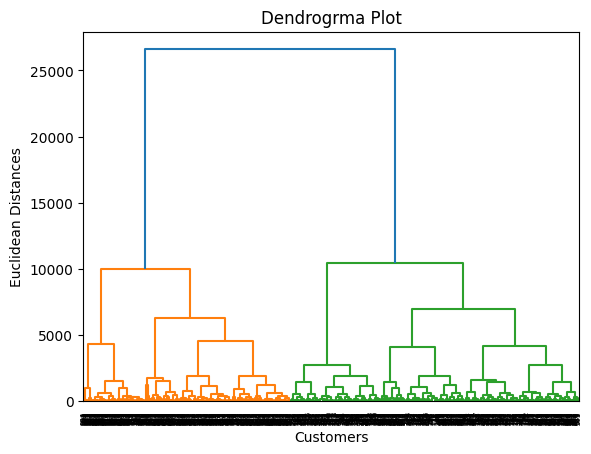

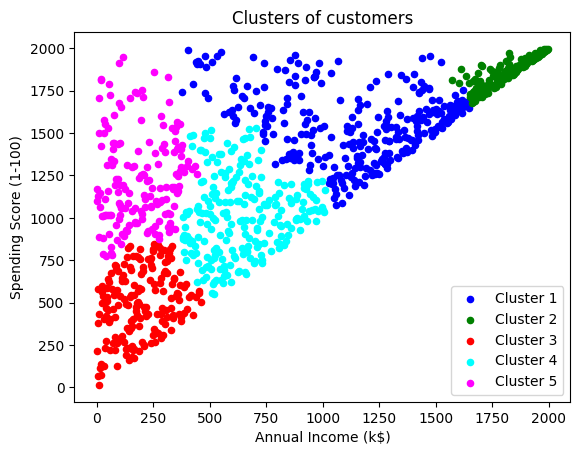

In [249]:
import scipy.cluster.hierarchy as shc
Z = linkage(np.reshape(result_list_pesata, (len(result_list_pesata), 1)))
dendro = shc.dendrogram(shc.linkage(Z, method="ward"))
plt.title("Dendrogrma Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("Customers")
plt.show()

#training the hierarchical model on dataset
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_pred= hc.fit_predict(Z)

plt.scatter(Z[y_pred == 0, 0],Z[y_pred == 0, 1], s = 20, c = 'blue', label = 'Cluster 1')
plt.scatter(Z[y_pred == 1, 0], Z[y_pred == 1, 1], s = 20, c = 'green', label = 'Cluster 2')
plt.scatter(Z[y_pred== 2, 0], Z[y_pred == 2, 1], s = 20, c = 'red', label = 'Cluster 3')
plt.scatter(Z[y_pred == 3, 0], Z[y_pred == 3, 1], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(Z[y_pred == 4, 0], Z[y_pred == 4, 1], s = 20, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [250]:
#creazione array contenente i 5 valori più alti ottenuti dalla funzione di jaccard similarity
def Nmaxelements(list1, N):
    final_list = []

    for i in range(0, N):
        max1 = 0

        for j in range(len(list1)):
            if list1[j] > max1:
                max1 = list1[j];

        print(np.where(list1 == max1))
        list1 = list1[list1 != max1]
        final_list.append(max1)

    print(final_list)
    return(final_list)


final_list = Nmaxelements(result_list, 5)

final_list_pesata = Nmaxelements(result_list_pesata, 5)

(array([116]),)
(array([831]),)
(array([641]),)
(array([747]),)
(array([474]),)
[0.04779411764705882, 0.045283018867924525, 0.04460966542750929, 0.04332129963898917, 0.03759398496240601]
(array([552]),)
(array([359]),)
(array([875]),)
(array([401]),)
(array([894]),)
[0.011132673579287782, 0.011080216584671464, 0.010840726854080019, 0.010475753845631007, 0.009489743135575393]


In [251]:
#funzione che mostra il poster del film
def imshow(index):
    url = imdb.loc[index, "Poster_Link"]
    img = Image.open(BytesIO(requests.get(url).content))
    plt.imshow(img)
    plt.show()

Film input:




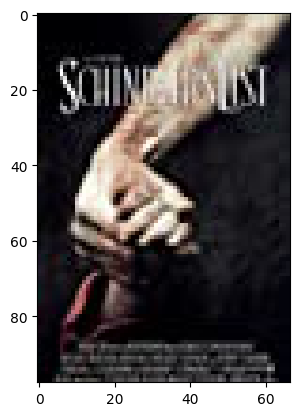

Schindler's List


Steven Spielberg


Biography, Drama, History


Liam Neeson ,Ralph Fiennes ,Ben Kingsley ,Caroline Goodall


In German-occupied Poland during World War II, industrialist Oskar Schindler gradually becomes concerned for his Jewish workforce after witnessing their persecution by the Nazis.
------------------------------


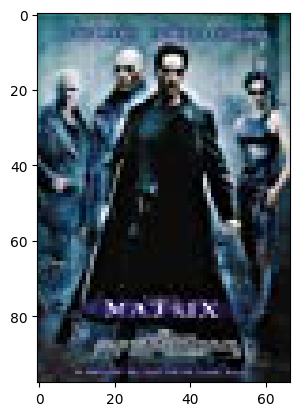

The Matrix


Lana Wachowski


Action, Sci-Fi


Lilly Wachowski ,Keanu Reeves ,Laurence Fishburne ,Carrie-Anne Moss


When a beautiful stranger leads computer hacker Neo to a forbidding underworld, he discovers the shocking truth--the life he knows is the elaborate deception of an evil cyber-intelligence.
------------------------------


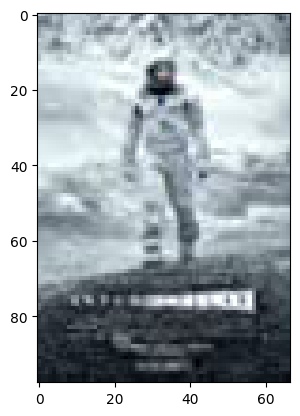

Interstellar


Christopher Nolan


Adventure, Drama, Sci-Fi


Matthew McConaughey ,Anne Hathaway ,Jessica Chastain ,Mackenzie Foy


A team of explorers travel through a wormhole in space in an attempt to ensure humanity's survival.
------------------------------


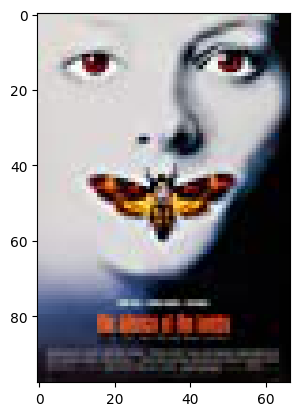

The Silence of the Lambs


Jonathan Demme


Crime, Drama, Thriller


Jodie Foster ,Anthony Hopkins ,Lawrence A. Bonney ,Kasi Lemmons


A young F.B.I. cadet must receive the help of an incarcerated and manipulative cannibal killer to help catch another serial killer, a madman who skins his victims.
------------------------------


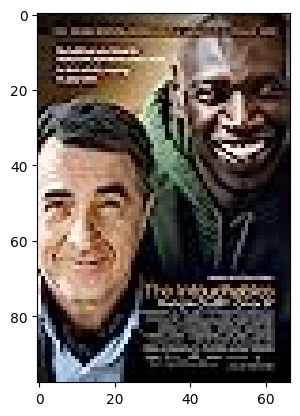

The Intouchables


Olivier Nakache


Biography, Comedy, Drama


Éric Toledano ,François Cluzet ,Omar Sy ,Anne Le Ny


After he becomes a quadriplegic from a paragliding accident, an aristocrat hires a young man from the projects to be his caregiver.
------------------------------


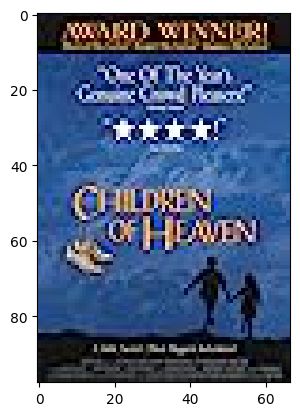

Bacheha-Ye aseman


Majid Majidi


Drama, Family, Sport


Mohammad Amir Naji ,Amir Farrokh Hashemian ,Bahare Seddiqi ,Nafise Jafar-Mohammadi


After a boy loses his sister's pair of shoes, he goes on a series of adventures in order to find them. When he can't, he tries a new way to "win" a new pair.
------------------------------


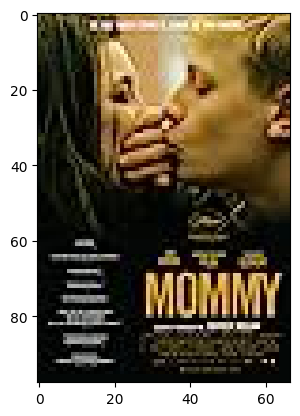

Mommy


Xavier Dolan


Drama


Anne Dorval ,Antoine Olivier Pilon ,Suzanne Clément ,Patrick Huard


A widowed single mother, raising her violent son alone, finds new hope when a mysterious neighbor inserts herself into their household.
------------------------------


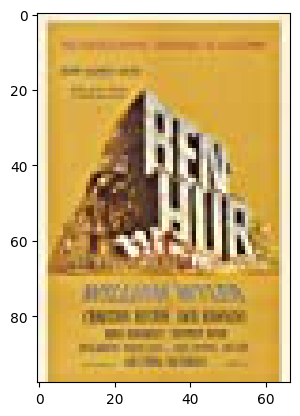

Ben-Hur


William Wyler


Adventure, Drama, History


Charlton Heston ,Jack Hawkins ,Stephen Boyd ,Haya Harareet


After a Jewish prince is betrayed and sent into slavery by a Roman friend, he regains his freedom and comes back for revenge.
------------------------------


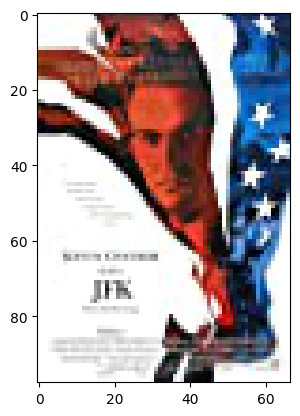

JFK


Oliver Stone


Drama, History, Thriller


Kevin Costner ,Gary Oldman ,Jack Lemmon ,Walter Matthau


New Orleans District Attorney Jim Garrison discovers there's more to the Kennedy assassination than the official story.
------------------------------


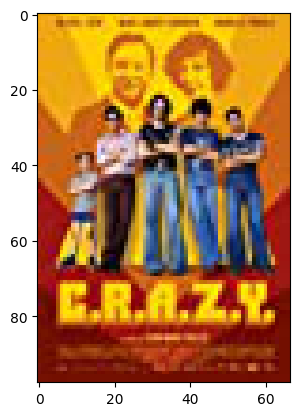

C.R.A.Z.Y.


Jean-Marc Vallée


Comedy, Drama


Michel Côté ,Marc-André Grondin ,Danielle Proulx ,Émile Vallée


A young French-Canadian, growing up in the 1960s and 1970s, struggles to reconcile his emerging homosexuality with his father's conservative values and his own Catholic beliefs.
------------------------------






Film consigliati dall algoritmo jaccard:




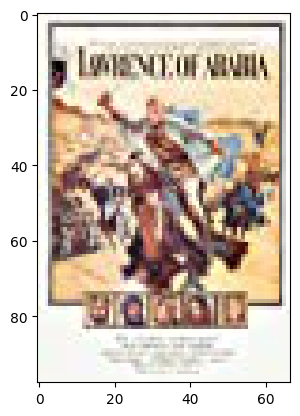

Lawrence of Arabia


David Lean


Adventure, Biography, Drama


Peter O'Toole , Alec Guinness , Anthony Quinn , Jack Hawkins


The story of T.E. Lawrence, the English officer who successfully united and led the diverse, often warring, Arab tribes during World War I in order to fight the Turks.
------------------------------


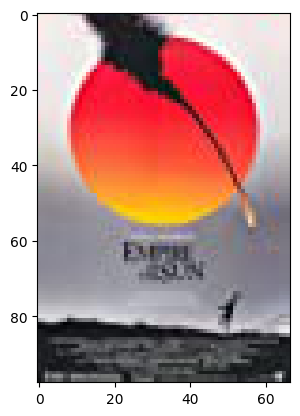

Empire of the Sun


Steven Spielberg


Action, Drama, History


Christian Bale , John Malkovich , Miranda Richardson , Nigel Havers


A young English boy struggles to survive under Japanese occupation during World War II.
------------------------------


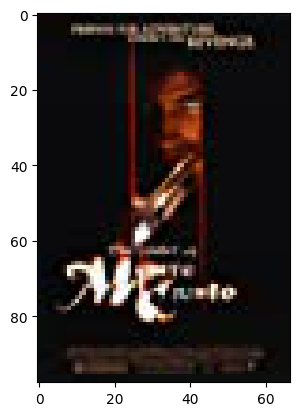

The Count of Monte Cristo


Kevin Reynolds


Action, Adventure, Drama


Jim Caviezel , Guy Pearce , Christopher Adamson , JB Blanc


A young man, falsely imprisoned by his jealous "friend", escapes and uses a hidden treasure to exact his revenge.
------------------------------


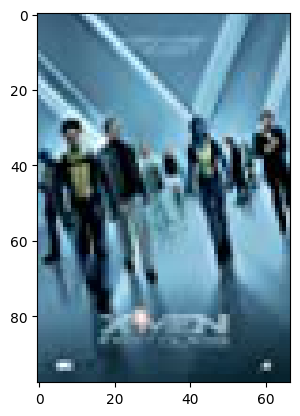

X: First Class


Matthew Vaughn


Action, Adventure, Sci-Fi


James McAvoy , Michael Fassbender , Jennifer Lawrence , Kevin Bacon


In the 1960s, superpowered humans Charles Xavier and Erik Lensherr work together to find others like them, but Erik's vengeful pursuit of an ambitious mutant who ruined his life causes a schism to divide them.
------------------------------


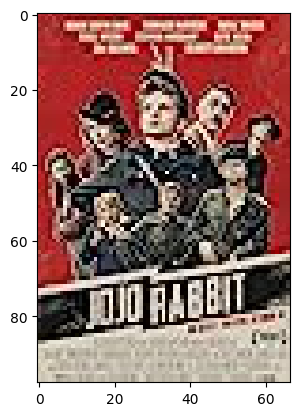

Jojo Rabbit


Taika Waititi


Comedy, Drama, War


Roman Griffin Davis , Thomasin McKenzie , Scarlett Johansson , Taika Waititi


A young boy in Hitler's army finds out his mother is hiding a Jewish girl in their home.
------------------------------


film consigliati dall algoritmo jaccard pesato: 




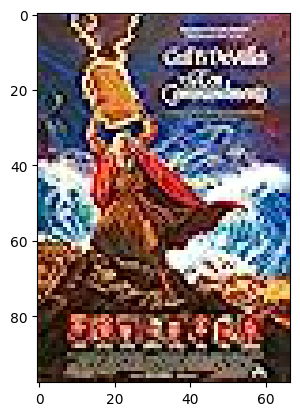

The Ten Commandments


Cecil B. DeMille


Adventure, Drama


Charlton Heston , Yul Brynner , Anne Baxter , Edward G. Robinson


Moses, an Egyptian Prince, learns of his true heritage as a Hebrew and his divine mission as the deliverer of his people.
------------------------------


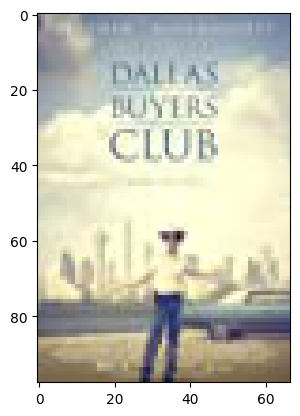

Dallas Buyers Club


Jean-Marc Vallée


Biography, Drama


Matthew McConaughey , Jennifer Garner , Jared Leto , Steve Zahn


In 1985 Dallas, electrician and hustler Ron Woodroof works around the system to help AIDS patients get the medication they need after he is diagnosed with the disease.
------------------------------


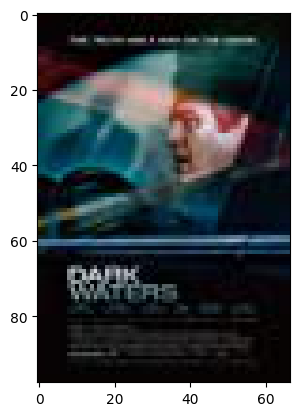

Dark Waters


Todd Haynes


Biography, Drama, History


Mark Ruffalo , Anne Hathaway , Tim Robbins , Bill Pullman


A corporate defense attorney takes on an environmental lawsuit against a chemical company that exposes a lengthy history of pollution.
------------------------------


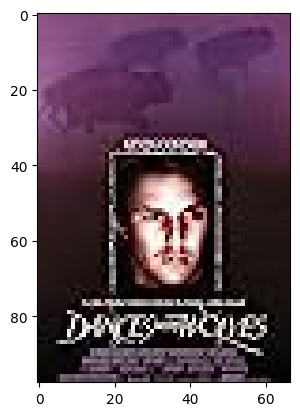

Dances with Wolves


Kevin Costner


Adventure, Drama, Western


Kevin Costner , Mary McDonnell , Graham Greene , Rodney A. Grant


Lieutenant John Dunbar, assigned to a remote western Civil War outpost, befriends wolves and Indians, making him an intolerable aberration in the military.
------------------------------


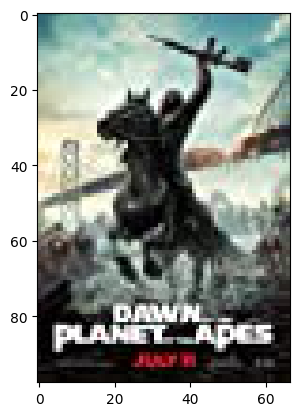

Dawn of the Planet of the Apes


Matt Reeves


Action, Adventure, Drama


Gary Oldman , Keri Russell , Andy Serkis , Kodi Smit-McPhee


A growing nation of genetically evolved apes led by Caesar is threatened by a band of human survivors of the devastating virus unleashed a decade earlier.
------------------------------




['Schindlers', 'List', 'Biography', 'Drama', 'History', 'Biography', 'Drama', 'History', 'Biography', 'Drama', 'History', 'Biography', 'Drama', 'History', 'In', 'Germanoccupied', 'Poland', 'World', 'War', 'II', 'industrialist', 'Oskar', 'Schindler', 'gradually', 'concerned', 'Jewish', 'workforce', 'witnessing', 'persecution', 'Nazis', 'Steven', 'Spielberg', 'Steven', 'Spielberg', 'Steven', 'Spielberg', 'Steven', 'Spielberg', 'Steven', 'Spielberg', 'Liam', 'Neeson', 'Liam', 'Neeson', 'Liam', 'Neeson', 'Liam', 'Neeson', 'Liam', 'Neeson', 'Liam', 'Neeson', 'Liam', 'Neeson', 'Liam', 'Neeson', 'Liam', 'Neeson', 'Liam', 'Neeson', 'Ralph', 'Fiennes', 'Ralph', 'Fiennes', 'R

In [252]:
#film scelto
print('Film input:')
print("\n")
for i in range(1000):
  if(imdb['Like'].iloc[i] == 1):
    imshow(i)
    print(imdb.loc[i].Series_Title)
    print("\n")
    print(imdb.loc[i].Director)
    print("\n")
    print(imdb.loc[i].Genre)
    print("\n")
    print(imdb.loc[i].Star1 + " ," + imdb.loc[i].Star2 + " ," + imdb.loc[i].Star3+ " ," + imdb.loc[i].Star4)
    print("\n")
    print(imdb.loc[i].Overview)
    print('-'*30)

print("\n")
print("\n")

print("\n")
print('Film consigliati dall algoritmo jaccard:')
print("\n")
#output dei 5 film consigliati rispetto al film dato in input
for i in range(len(final_list)):
  for j in range(len(result_list)):
    if(final_list[i]==result_list[j]):
      imshow(j)
      print(imdb.loc[j].Series_Title)
      print("\n")
      print(imdb.loc[j].Director)
      print("\n")
      print(imdb.loc[j].Genre)
      print("\n")
      print(imdb.loc[j].Star1 + " , " + imdb.loc[j].Star2 + " , " + imdb.loc[j].Star3+ " , " + imdb.loc[j].Star4 )
      print("\n")
      print(imdb.loc[j].Overview)
      print('-'*30)

print("\n")
print("film consigliati dall algoritmo jaccard pesato: ")
print("\n")

for i in range(len(final_list_pesata)):
  for j in range(len(result_list_pesata)):
    if(final_list_pesata[i]==result_list_pesata[j]):
      imshow(j)
      print(imdb.loc[j].Series_Title)
      print("\n")
      print(imdb.loc[j].Director)
      print("\n")
      print(imdb.loc[j].Genre)
      print("\n")
      print(imdb.loc[j].Star1 + " , " + imdb.loc[j].Star2 + " , " + imdb.loc[j].Star3+ " , " + imdb.loc[j].Star4 )
      print("\n")
      print(imdb.loc[j].Overview)
      print('-'*30)
print("\n")
print("\n")
print(list1)
print("\n")

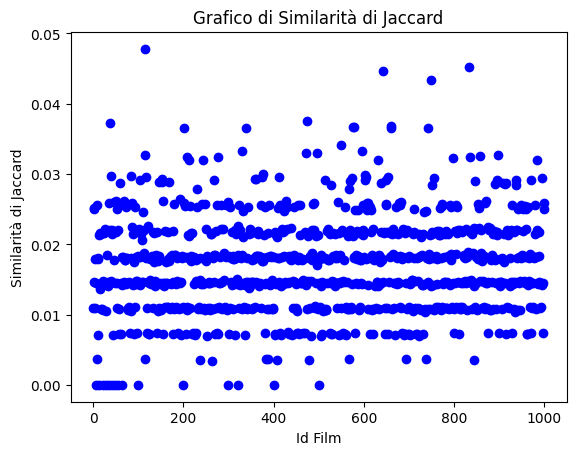

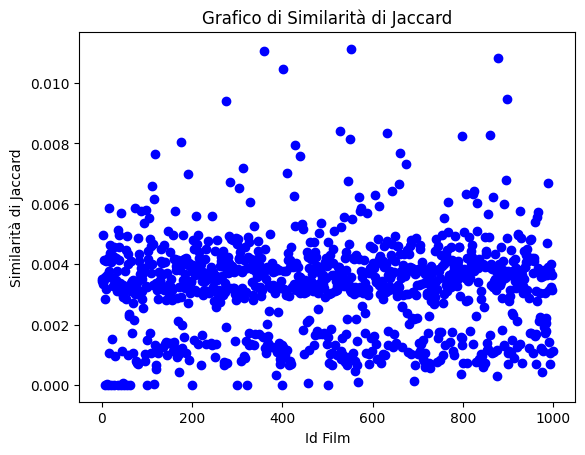

In [253]:


import matplotlib.pyplot as plt

# Dati di esempio

similarity_scores = result_list  # Valori di similarità

x_values = range(len(similarity_scores))  # Coordinate x per i punti



# Creazione del grafico

plt.scatter(x_values, similarity_scores, color='b', marker='o')

plt.xlabel('Id Film')

plt.ylabel('Similarità di Jaccard')

plt.title('Grafico di Similarità di Jaccard')



# Visualizzazione del grafico

plt.show()

#DATI PER LA JACCARD PESATA
# Dati di esempio

similarity_scores = result_list_pesata  # Valori di similarità

x_values = range(len(similarity_scores))  # Coordinate x per i punti



# Creazione del grafico

plt.scatter(x_values, similarity_scores, color='b', marker='o')

plt.xlabel('Id Film')

plt.ylabel('Similarità di Jaccard')

plt.title('Grafico di Similarità di Jaccard')



# Visualizzazione del grafico

plt.show()



In [254]:
#Modifica del dataset con dati numeri binari per utilizzare un decision tree
#Utilizzo un altro dataset che abbia per generi variabili booleane

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/FiddiCoder/-FIA-Project/main/"
FILE_PATH = os.path.join("dataset")
FILE_URL1 = DOWNLOAD_ROOT + "dataset/movies2"

def fetch_file_data1(file_url1=FILE_URL1, file_path1=FILE_PATH):
    os.makedirs(file_path1, exist_ok=True)
    csv_path1 = os.path.join(file_path1, "movies2")
    urllib.request.urlretrieve(file_url1, csv_path1)

fetch_file_data1()
datapath = os.path.join("dataset","")

with open('./dataset/movies2', encoding = "ISO-8859-1") as content:
    mCols = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'imdb_url']
    genres = ['unknown', 'action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
          'film-noir',  'horror', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western']
    mColsG = mCols + genres
    movies_info = pd.DataFrame(columns=mColsG)
    i = 0
    for x in content:
        x = x.split("|")
        x[-1] = x[-1][:-1]
        if x[1][-1] == ' ':
            x[1] = x[1][:-1]
        movies_info.loc[i] = [word if word!='' else "empty" for word in x]
        i = i + 1
movies_info['movie_id'] = movies_info['movie_id'].astype('int64')
movies_info[genres] = movies_info[genres].astype('int64')


movies_info = movies_info.drop('video_release_date', axis=1)
movies_info = movies_info.drop('release_date', axis=1)
movies_info = movies_info.drop('imdb_url', axis=1)
movies_info['like'] = 0

#for i in range(1600):
#  if((i % 8) == 0):
#    movies_info.loc[i , 'like'] = 2
#  if((i % 7) == 0):
#     movies_info.loc[i , 'like'] = 3
#  if((i % 5) == 0):
#    movies_info.loc[i , 'like'] = 4
#  if((i % 6) == 0):
#    movies_info.loc[i , 'like'] = 5
#  if(movies_info.loc[i, 'like'] == 0):
#    movies_info = movies_info.drop(i, axis=0)


movies_info.head(100)


,movie_id,movie_title,unknown,action,adventure,animation,children,comedy,crime,documentary,...,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western,like
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Terminator 2: Judgment Day (1991),0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
96,97,Dances with Wolves (1990),0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
97,98,"Silence of the Lambs, The (1991)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
98,99,Snow White and the Seven Dwarfs (1937),0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [255]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import datasets, linear_model,tree

X = movies_info.iloc[:,2:20]
print(X.columns)
y = movies_info.iloc[:,21:]
print(y.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.20, random_state=0)

dtree = tree.DecisionTreeRegressor()
model_dt = dtree.fit(X_train, y_train)

for i in range(1, len(movies_info)):
    movie = movies_info.iloc[i, 1]
    if(movie == 'Turbo: A Power Rangers Movie (1997)'):
        mov1_feature = movies_info.iloc[i,2:20]
    if(movie == 'Dead Man Walking (1995)'):
        mov2_feature = movies_info.iloc[i,2:20]
    if (movie == 'Chasing Amy (1997)'):
        mov3_feature = movies_info.iloc[i,2:20]

print("prediction for Turbo: A Power Rangers Movie (1997)")
print(dtree.predict([mov1_feature]))
print("prediction for Dead Man Walking (1995)")
print(dtree.predict([mov2_feature]))
print("prediction for Chasing Amy (1997)")
print(dtree.predict([mov3_feature]))
print("\n")

dt_scores = cross_val_score(model_dt, X_train, y_train, cv = 10)
print("cross validation scores: \n",dt_scores)
print("testing score: {}".format(model_dt.score(X_test, y_test)))
print("\n")

#SCORE BASSO, SERVE DATASET UTENTI DA JOINARE CON DATASET FILM PER AVERE PIù ENTRY FILM E RATING FEDELI

Index(['unknown', 'action', 'adventure', 'animation', 'children', 'comedy',
       'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror',
       'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war'],
      dtype='object')
Index(['like'], dtype='object')
prediction for Turbo: A Power Rangers Movie (1997)
[0.]
prediction for Dead Man Walking (1995)
[0.]
prediction for Chasing Amy (1997)
[0.]


cross validation scores: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
testing score: 1.0




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [256]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/FiddiCoder/-FIA-Project/main/"
FILE_PATH = os.path.join("dataset")
FILE_URL1 = DOWNLOAD_ROOT + "dataset/users.user"

def fetch_file_data1(file_url1=FILE_URL1, file_path1=FILE_PATH):
    os.makedirs(file_path1, exist_ok=True)
    csv_path1 = os.path.join(file_path1, "users.user")
    urllib.request.urlretrieve(file_url1, csv_path1)

fetch_file_data1()
datapath = os.path.join("dataset","")

userCols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users_info = pd.read_csv('./dataset/users.user', sep='|', names=userCols)
users_info = users_info.drop('zip_code', axis=1)
users_info.head(100)


users_info = users_info[users_info['gender'] != 'empty']
users_info = users_info[users_info['occupation'] != 'empty']


users_info['occupation'] = users_info['occupation'].astype('category')
users_info['gender'] = users_info['gender'].astype('category')
one_hot_occ = users_info.occupation.str.get_dummies()
users_info = users_info.drop('occupation',axis=1)
users_info = users_info.join(one_hot_occ,how='inner')
one_hot_g = users_info.gender.str.get_dummies()
users_info = users_info.drop('gender',axis=1)
users_info = users_info.join(one_hot_g,how='inner')
users_info.head(5)
#TRASFORMARE OCCUPATION IN PIù COLONNE BOOLEANE

,user_id,age,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,...,other,programmer,retired,salesman,scientist,student,technician,writer,F,M
0,1,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,53,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,3,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,4,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,5,33,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [257]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/FiddiCoder/-FIA-Project/main/"
FILE_PATH = os.path.join("dataset")
FILE_URL1 = DOWNLOAD_ROOT + "dataset/usersmovies.data"

def fetch_file_data1(file_url1=FILE_URL1, file_path1=FILE_PATH):
    os.makedirs(file_path1, exist_ok=True)
    csv_path1 = os.path.join(file_path1, "usersmovies.data")
    urllib.request.urlretrieve(file_url1, csv_path1)

fetch_file_data1()
datapath = os.path.join("dataset","")

umCols = ['user_id', 'movie_id', 'rating', 'timestamp']
user_movie_info = pd.read_csv('./dataset/usersmovies.data', sep='\t', names=umCols)
user_movie_info = user_movie_info.drop('timestamp', axis=1)
user_movie_info.head(50)

#FARE MESH COMPLETA FILM-UTENTI

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
5,298,474,4
6,115,265,2
7,253,465,5
8,305,451,3
9,6,86,3


In [258]:
movies_info = movies_info.drop('like', axis=1)
#DA ORA UTILIZZEREMO LIKE EFFETTIVI DI UTENTI

In [259]:
multi_user_movie = user_movie_info.merge(movies_info, left_on='movie_id', right_on='movie_id', how='inner')


multi_user_movie = multi_user_movie.merge(users_info, left_on='user_id', right_on='user_id', how='inner')

column_to_move = multi_user_movie.pop("rating")
multi_user_movie.insert(46, "rating", column_to_move)
multi_user_movie.head(5)


,user_id,movie_id,movie_title,unknown,action,adventure,animation,children,comedy,crime,...,programmer,retired,salesman,scientist,student,technician,writer,F,M,rating
0,196,242,Kolya (1996),0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,3
1,196,257,Men in Black (1997),0,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,2
2,196,111,"Truth About Cats & Dogs, The (1996)",0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,4
3,196,25,"Birdcage, The (1996)",0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,4
4,196,382,"Adventures of Priscilla, Queen of the Desert, ...",0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,4


In [263]:
X = multi_user_movie.iloc[:,3:46]
print(X.columns)
y = multi_user_movie.iloc[:,46:]
print(y.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.20, random_state=0)

dtree = tree.DecisionTreeRegressor()
model_dt = dtree.fit(X_train, y_train)

for i in range(1, len(multi_user_movie)):
    movie = multi_user_movie.iloc[i, 2]
    if(movie == 'Little Buddha (1993)'):
        mov1_feature = multi_user_movie.iloc[i, 3:46]
    if(movie == 'Little Big League (1994)'):
        mov2_feature = multi_user_movie.iloc[i, 3:46]
    if (movie == 'Metro (1997)'):
        mov3_feature = multi_user_movie.iloc[i, 3:46]

print("prediction for Turbo: A Power Rangers Movie (1997)")
print(dtree.predict([mov1_feature]))
print("prediction for Dead Man Walking (1995)")
print(dtree.predict([mov2_feature]))
print("prediction for Chasing Amy (1997)")
print(dtree.predict([mov3_feature]))
print("\n")

dt_scores = cross_val_score(model_dt, X_train, y_train, cv = 10)
print("cross validation scores: \n",dt_scores)
print("testing score: {}".format(model_dt.score(X_test, y_test)))
print("\n")

Index(['unknown', 'action', 'adventure', 'animation', 'children', 'comedy',
       'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror',
       'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western',
       'age', 'administrator', 'artist', 'doctor', 'educator', 'engineer',
       'entertainment', 'executive', 'healthcare', 'homemaker', 'lawyer',
       'librarian', 'marketing', 'none', 'other', 'programmer', 'retired',
       'salesman', 'scientist', 'student', 'technician', 'writer', 'F', 'M'],
      dtype='object')
Index(['rating'], dtype='object')
prediction for Turbo: A Power Rangers Movie (1997)
[3.85106383]
prediction for Dead Man Walking (1995)
[3.35294118]
prediction for Chasing Amy (1997)
[3.]




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


cross validation scores: 
 [-0.16277897 -0.11609219 -0.14044802 -0.15028991 -0.14385299 -0.14995778
 -0.16981587 -0.10959991 -0.1421438  -0.14452593]
testing score: -0.13347415240539307


